# K-NN classification

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [6]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
fruits.shape

(59, 7)

In [8]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
# x = [1, 2, 3] y = [a, b, c]
# zip(x, y) -> [1, a], [2, b], [3, c]

In [9]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [10]:
from matplotlib import cm

In [11]:
x = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# default
# train : test = 75 : 25
# 일부는 train dataset으로 일부는 test dataset으로 랜덤하게 split해서 사용

In [12]:
x_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


<IPython.core.display.Javascript object>


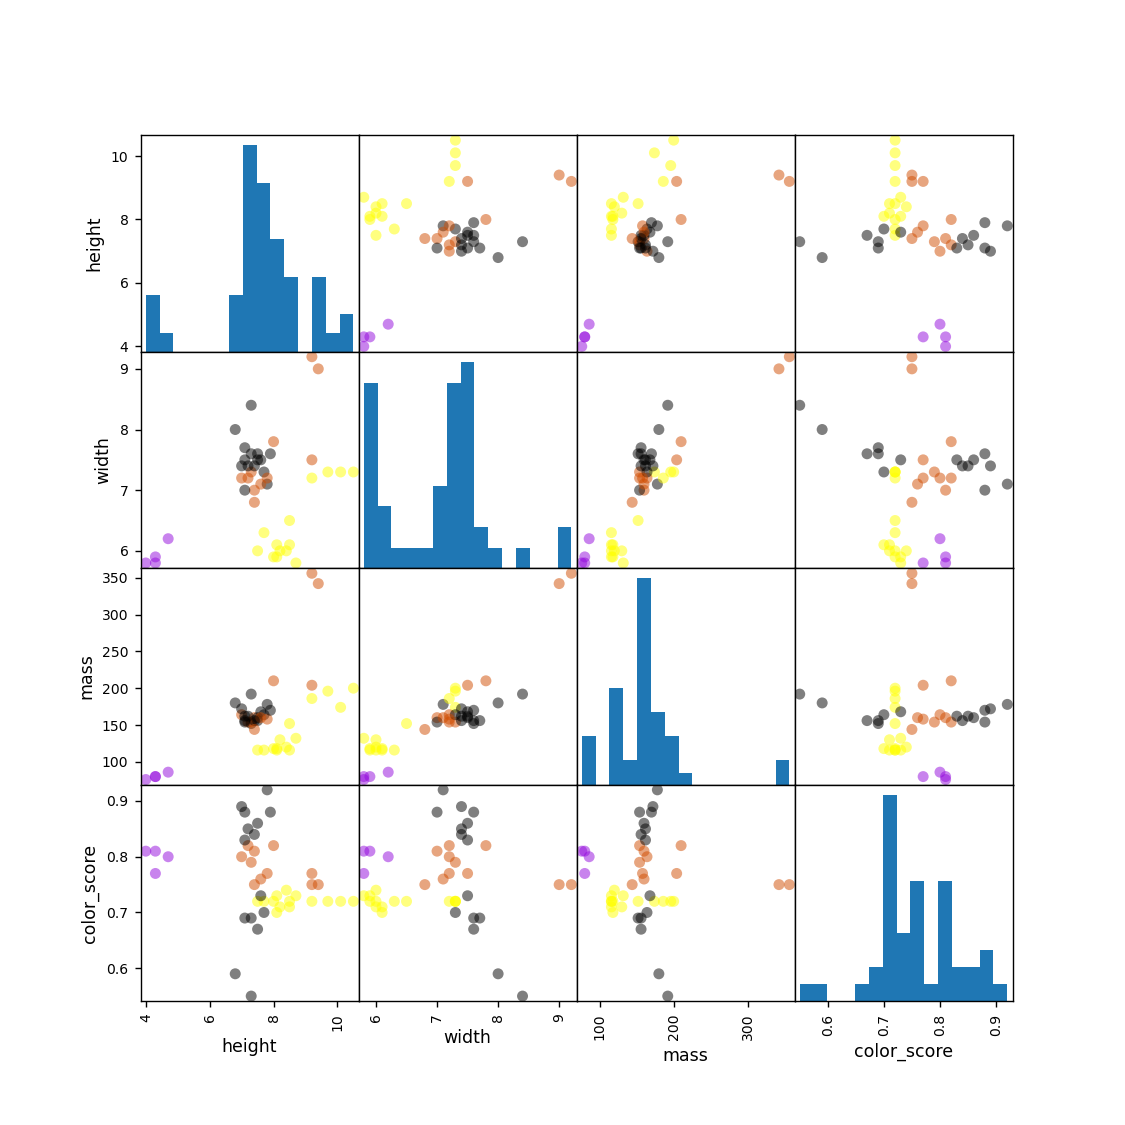

In [13]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_train, c=y_train, 
                                     marker='o', s=40, hist_kwds={'bins':15}, figsize=(9, 9), cmap=cmap)

In [20]:
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(x_test, y_test)

0.5333333333333333

In [23]:
knn.score(x_train, y_train)    # train data > test data 정확도 높음

0.7954545454545454

In [26]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [27]:
# parameter change
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

In [28]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

<IPython.core.display.Javascript object>


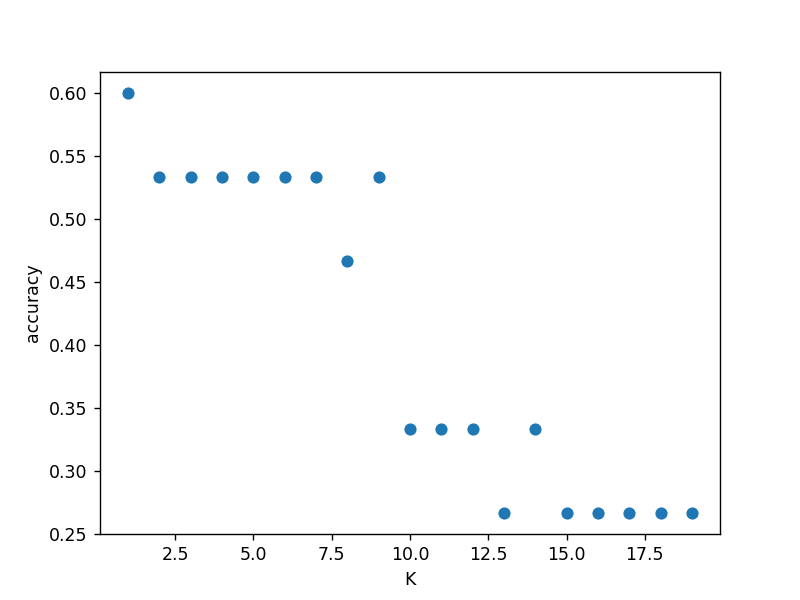

In [29]:
plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

In [30]:
# Sensitiveness of K-NN classification according to train/test split proportion

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors=5)

scores = []
for s in t:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-s)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test,y_test))

In [31]:
scores

[0.6666666666666666,
 0.6111111111111112,
 0.4583333333333333,
 0.43333333333333335,
 0.3333333333333333,
 0.5,
 0.5]

<IPython.core.display.Javascript object>


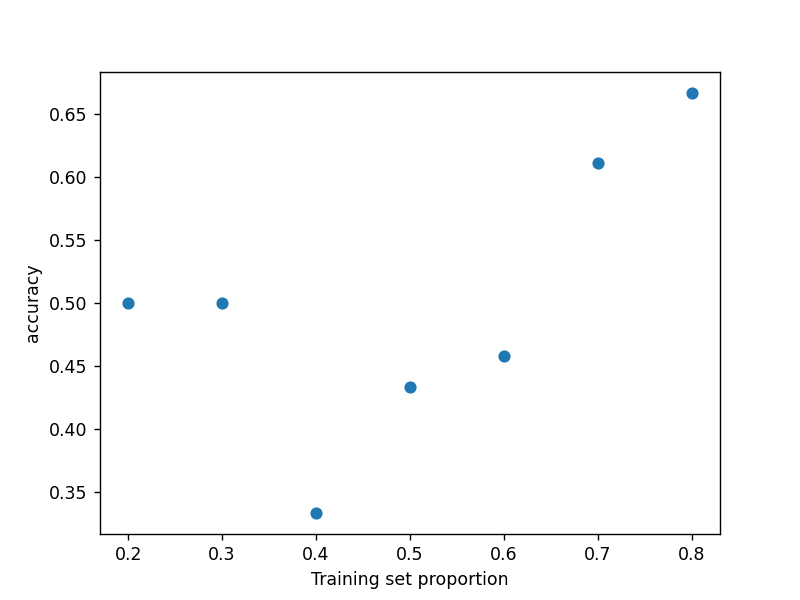

In [33]:
plt.figure()
plt.xlabel('Training set proportion')
plt.ylabel('accuracy')
plt.scatter(t, scores)